In [1]:
#import libraries
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as mp
from scipy.stats import linregress
from pathlib import Path



In [2]:
#path of csv files
covid_cleaned_data_path = "Cleaned_Covid_Data.csv"
covid_cleaned_dataframe = pd.read_csv(covid_cleaned_data_path)

covid_cleaned_dataframe.head()
#len(covid_cleaned_dataframe)

,Unnamed: 0,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths
0,0,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0
1,1,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0
2,2,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0
3,3,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0
4,4,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0


In [3]:
#QUESTIONS TO ANSWER

#What are the notable differences in the distribution of deaths involving COVID-19, pneumonia, and influenza among different months in the year? 
#Is there a trend in death volume based on time of year?

#column for months
months_column = ["January","February","March","April","May","June","July","August","September","October","November","December"]

nj_covid_data = covid_cleaned_dataframe.loc[covid_cleaned_dataframe["State"] == "New Jersey"]
nj_covid_data.head()

,Unnamed: 0,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths
1149,1581,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,New Jersey,All Sexes,All Ages,35691.0,312963.0,31031.0,17287.0
1150,1586,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,New Jersey,All Sexes,15-24 years,53.0,2051.0,58.0,15.0
1151,1587,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,New Jersey,All Sexes,18-29 years,166.0,4079.0,143.0,65.0
1152,1588,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,New Jersey,All Sexes,25-34 years,287.0,5603.0,243.0,129.0
1153,1589,09/27/2023,01/01/2020,09/23/2023,By Total,0.0,0.0,New Jersey,All Sexes,30-39 years,452.0,7323.0,369.0,198.0


C:\Users\Darshan Patel\AppData\Local\Temp\ipykernel_27024\401238541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nj_covid_data_2020["Month"] = months_column


Text(0.5, 1.0, 'Number of Covid-19 and Total Deaths, 2020')

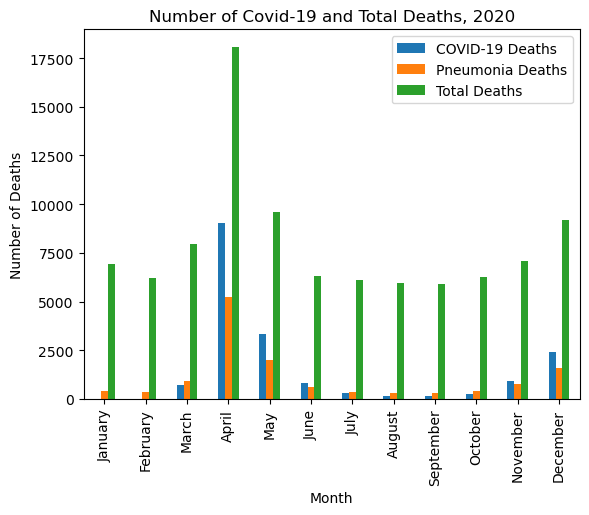

In [4]:


#Doind deaths by month for 2020, so I have to first sort this data by year 2020, and then sum all deaths by month 
nj_covid_data_2020 = nj_covid_data.loc[(nj_covid_data["Year"] == 2020.0) & (nj_covid_data["Month"] > 0) & (nj_covid_data["Age Group"] == 'All Ages') & (nj_covid_data["Sex"] == 'All Sexes')]
nj_covid_data_2020["Month"] = months_column

nj_covid_data_2020 = nj_covid_data_2020[['Month', 'COVID-19 Deaths','Pneumonia Deaths', 'Total Deaths',]]

nj_covid_data_2020.head(12)

nj_covid_data_2020.plot(x="Month", y=["COVID-19 Deaths","Pneumonia Deaths", "Total Deaths"], kind="bar")
plt.ylabel("Number of Deaths")
plt.title("Number of Covid-19 and Total Deaths, 2020")

C:\Users\Darshan Patel\AppData\Local\Temp\ipykernel_27024\4182592071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nj_covid_data_2021["Month"] = months_column


Text(0.5, 1.0, 'Number of Covid-19 and Total Deaths, 2021')

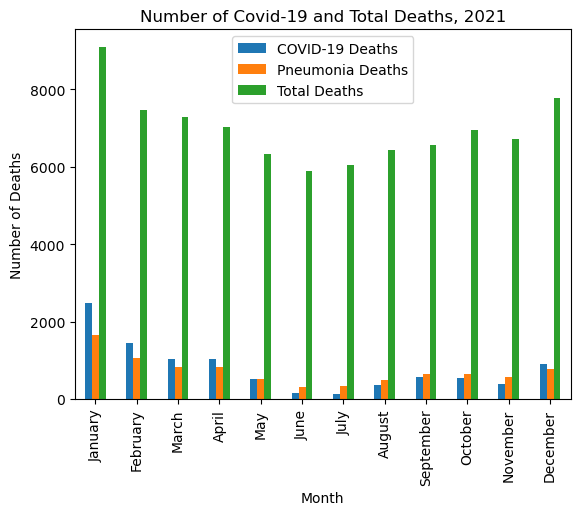

In [5]:
#Doing deaths by month for 2021, so I have to first sort this data by year 2021, and then sum all deaths by month 

nj_covid_data_2021 = nj_covid_data.loc[(nj_covid_data["Year"] == 2021.0) & (nj_covid_data["Month"] > 0) & (nj_covid_data["Age Group"] == 'All Ages') & (nj_covid_data["Sex"] == 'All Sexes')]
nj_covid_data_2021["Month"] = months_column

nj_covid_data_2021 = nj_covid_data_2021[['Month', 'COVID-19 Deaths','Pneumonia Deaths', 'Total Deaths']]

nj_covid_data_2021.head(12)

nj_covid_data_2021.plot(x="Month", y=["COVID-19 Deaths","Pneumonia Deaths", "Total Deaths"], kind="bar")
plt.ylabel("Number of Deaths")
plt.title("Number of Covid-19 and Total Deaths, 2021")

C:\Users\Darshan Patel\AppData\Local\Temp\ipykernel_27024\3184636677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nj_covid_data_2022["Month"] = months_column


Text(0.5, 1.0, 'Number of Covid-19 and Total Deaths, 2022')

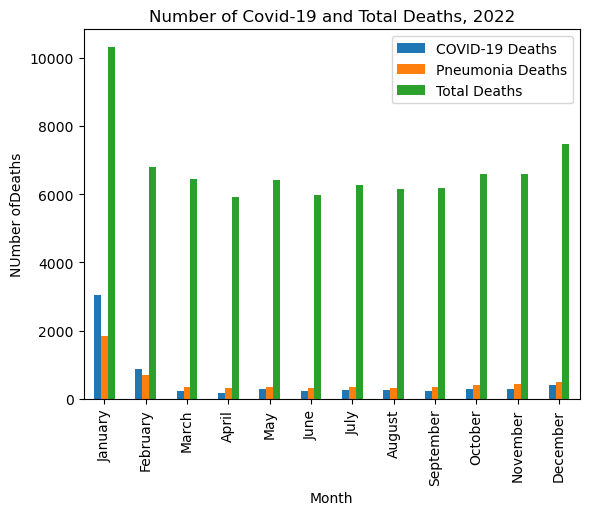

In [6]:
#Doing deaths by month for 2022, so I have to first sort this data by year 2022, and then sum all deaths by month 

nj_covid_data_2022 = nj_covid_data.loc[(nj_covid_data["Year"] == 2022.0) & (nj_covid_data["Month"] > 0) & (nj_covid_data["Age Group"] == 'All Ages') & (nj_covid_data["Sex"] == 'All Sexes')]
nj_covid_data_2022["Month"] = months_column

nj_covid_data_2022 = nj_covid_data_2022[['Month', 'COVID-19 Deaths','Pneumonia Deaths', 'Total Deaths']]

nj_covid_data_2022.head(12)

nj_covid_data_2022.plot(x="Month", y=["COVID-19 Deaths","Pneumonia Deaths", "Total Deaths"], kind="bar")
plt.ylabel("NUmber ofDeaths")
plt.title("Number of Covid-19 and Total Deaths, 2022")